In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [47]:
df = pd.read_csv("pokemon.csv")


In [48]:
df = df.drop(["#", "Generation", "Legendary"], axis=1)
df = df.rename(columns={"Type 1": "Type1", "Type 2": "Type2"})


In [49]:
df["Type2"].fillna("None", inplace=True)

In [50]:
df["IsLegendary"] = np.where(df["Total"] > 600, 1, 0)

Preprocesamiento de datos

In [51]:
df = df.dropna() 
df = df[df["Total"] >= 0] 

In [52]:
# Exploración de datos
print("Información general del dataset:")
print(df.info())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         800 non-null    object
 1   Type1        800 non-null    object
 2   Type2        800 non-null    object
 3   Total        800 non-null    int64 
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Atk      800 non-null    int64 
 8   Sp. Def      800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  IsLegendary  800 non-null    int32 
dtypes: int32(1), int64(7), object(3)
memory usage: 71.9+ KB
None


In [53]:
print("Resumen estadístico del dataset:")
print(df.describe())


Resumen estadístico del dataset:
           Total          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.00000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   435.10250   69.258750   79.001250   73.842500   72.820000   71.902500   
std    119.96304   25.534669   32.457366   31.183501   32.722294   27.828916   
min    180.00000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    330.00000   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    450.00000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    515.00000   80.000000  100.000000   90.000000   95.000000   90.000000   
max    780.00000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  IsLegendary  
count  800.000000   800.000000  
mean    68.277500     0.060000  
std     29.060474     0.237635  
min      5.000000     0.000000  
25%     45.000000     0.000000  
50%     65.000000     0.000000  
75%     90.0000

In [54]:
# Manejo de valores faltantes
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())

Cantidad de valores nulos por columna:
Name           0
Type1          0
Type2          0
Total          0
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
IsLegendary    0
dtype: int64


Diagrama de caja de las variables numéricas:


<AxesSubplot: >

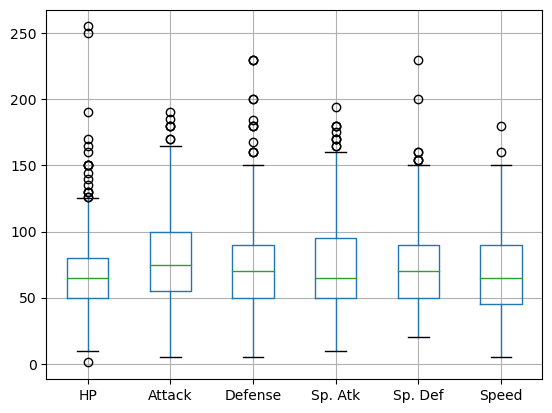

In [55]:
# Detección y manejo de valores atípicos
print("Diagrama de caja de las variables numéricas:")
df.boxplot(column=["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])

In [56]:
# Normalización o estandarización de datos
scaler = MinMaxScaler()
df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]] = scaler.fit_transform(
    df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
)

Analisis adicional


In [57]:
print("Análisis adicional:")

Análisis adicional:


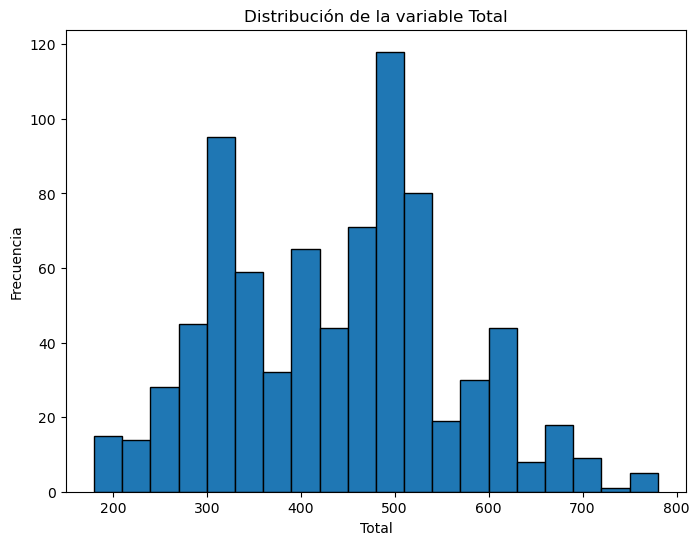

In [58]:
# Visualización de la distribución de la variable de interés
plt.figure(figsize=(8, 6))
plt.hist(df["Total"], bins=20, edgecolor="k")
plt.xlabel("Total")
plt.ylabel("Frecuencia")
plt.title("Distribución de la variable Total")
plt.show()

In [59]:

legendary_stats = df[df["IsLegendary"] == 1][stats].mean()
non_legendary_stats = df[df["IsLegendary"] == 0][stats].mean()

compare_stats = pd.concat([legendary_stats, non_legendary_stats], axis=1)
compare_stats.columns = ["Legendarios", "No Legendarios"]
print("Comparación de estadísticas entre Pokémon legendarios y no legendarios:")
print(compare_stats)

Comparación de estadísticas entre Pokémon legendarios y no legendarios:
         Legendarios  No Legendarios
HP          0.380823        0.261581
Attack      0.705856        0.380484
Defense     0.463796        0.295892
Sp. Atk     0.642550        0.322192
Sp. Def     0.419048        0.236183
Speed       0.528214        0.350950


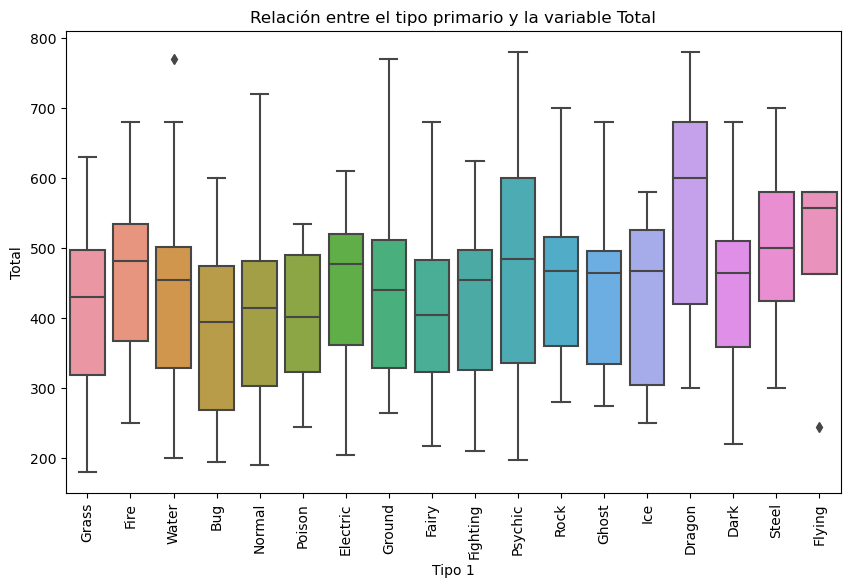

In [60]:
# Relación entre el tipo primario y la variable de interés
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Type1"], y=df["Total"])
plt.xticks(rotation=90)
plt.xlabel("Tipo 1")
plt.ylabel("Total")
plt.title("Relación entre el tipo primario y la variable Total")
plt.show()

EDA : Análisis de correlación

In [61]:
corr_matrix = df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Total"]].corr()
print("Matriz de correlación:")
print(corr_matrix)

Matriz de correlación:
               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed     Total
HP       1.000000  0.422386  0.239622  0.362380  0.378718  0.175952  0.618748
Attack   0.422386  1.000000  0.438687  0.396362  0.263990  0.381240  0.736211
Defense  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227  0.612787
Sp. Atk  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018  0.747250
Sp. Def  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133  0.717609
Speed    0.175952  0.381240  0.015227  0.473018  0.259133  1.000000  0.575943
Total    0.618748  0.736211  0.612787  0.747250  0.717609  0.575943  1.000000


EDA: Análisis de tipos de Pokemo

In [62]:
type_counts = df["Type1"].value_counts()
print("Distribución de tipos de Pokemon:")
print(type_counts)

Distribución de tipos de Pokemon:
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type1, dtype: int64


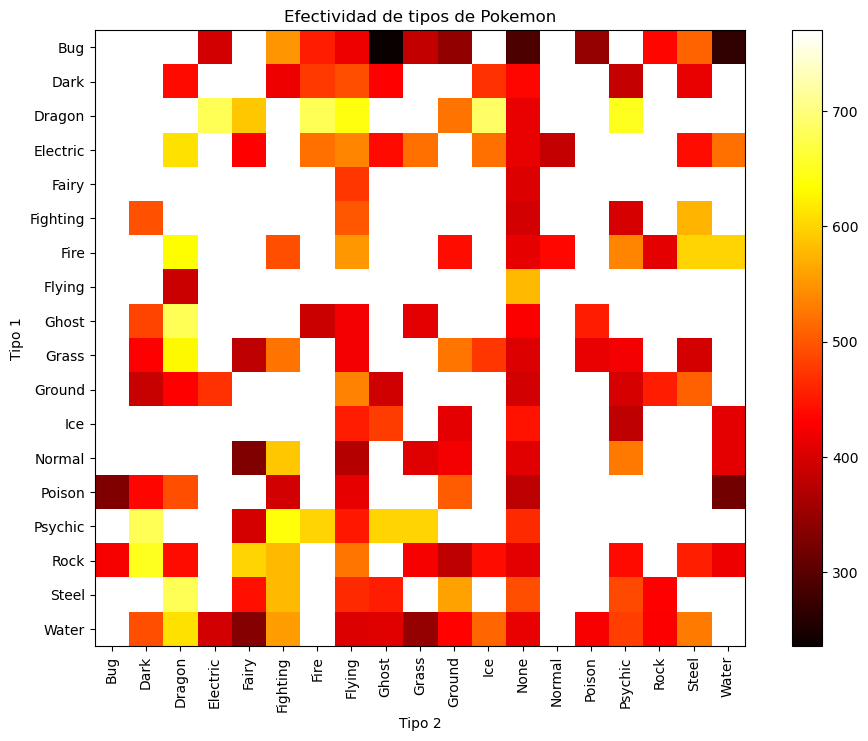

In [63]:

type_effectiveness = df.groupby(["Type1", "Type2"])["Total"].mean().unstack()
plt.figure(figsize=(12, 8))
plt.imshow(type_effectiveness, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Efectividad de tipos de Pokemon")
plt.xticks(np.arange(len(type_effectiveness.columns)), type_effectiveness.columns, rotation=90)
plt.yticks(np.arange(len(type_effectiveness.index)), type_effectiveness.index)
plt.xlabel("Tipo 2")
plt.ylabel("Tipo 1")
plt.show()

EDA: Análisis de estadísticas por tipo de Pokemon

In [64]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
df_stats = pd.DataFrame(columns=["Type", "Mean", "Median", "Std"])
for t in df["Type1"].unique():
    type_df = df[df["Type1"] == t]
    for stat in stats:
        mean = type_df[stat].mean()
        median = type_df[stat].median()
        std = type_df[stat].std()
        df_stats = df_stats.append({"Type": t, "Mean": mean, "Median": median, "Std": std}, ignore_index=True)


C:\Users\Maty\AppData\Local\Temp\ipykernel_5536\3905997876.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stats = df_stats.append({"Type": t, "Mean": mean, "Median": median, "Std": std}, ignore_index=True)
C:\Users\Maty\AppData\Local\Temp\ipykernel_5536\3905997876.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stats = df_stats.append({"Type": t, "Mean": mean, "Median": median, "Std": std}, ignore_index=True)
C:\Users\Maty\AppData\Local\Temp\ipykernel_5536\3905997876.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stats = df_stats.append({"Type": t, "Mean": mean, "Median": median, "Std": std}, ignore_index=True)
C:\Users\Maty\AppData\Local\Temp\ipykernel_5536\3905997876.py:9: FutureWarning: The frame.a

In [65]:
df_stats = df_stats[df_stats["Type"] != "None"]
df_stats = df_stats.sort_values(by=["Mean"], ascending=False)
print("Estadísticas por tipo de Pokemon:")
print(df_stats)

Estadísticas por tipo de Pokemon:
         Type      Mean    Median       Std
85     Dragon  0.579054  0.586486  0.182393
107    Flying  0.557143  0.634286  0.183422
98      Steel  0.539424  0.511111  0.199140
55   Fighting  0.496096  0.513514  0.152920
43     Ground  0.490541  0.432432  0.178698
..        ...       ...       ...       ...
22        Bug  0.213320  0.190476  0.152983
58   Fighting  0.212875  0.204762  0.108313
34     Poison  0.211395  0.192857  0.094702
28     Normal  0.208212  0.192857  0.119728
46     Ground  0.203571  0.202381  0.101276

[108 rows x 4 columns]


In [66]:
df_counts = pd.DataFrame(df["Type1"].value_counts())
df_counts.reset_index(inplace=True)
df_counts.columns = ["Type", "Count"]

In [67]:
df_merged = pd.merge(df_stats, df_counts, on="Type")

In [68]:
df_merged["Ratio"] = df_merged["Count"] / df_merged["Mean"]
df_merged = df_merged.sort_values(by=["Ratio"], ascending=False)
print("Ratio de aparición por tipo de Pokemon:")
print(df_merged)

Ratio de aparición por tipo de Pokemon:
      Type      Mean    Median       Std  Count       Ratio
65  Normal  0.208212  0.192857  0.119728     98  470.674446
83   Water  0.240561  0.214286  0.135526    112  465.577943
64  Normal  0.243764  0.244444  0.105653     98  402.027907
82   Water  0.279774  0.271654  0.108217    112  400.323659
63  Normal  0.249002  0.217391  0.130143     98  393.571492
..     ...       ...       ...       ...    ...         ...
10  Flying  0.272222  0.311111  0.094933      4   14.693878
9   Flying  0.274606  0.307087  0.081473      4   14.566308
8   Flying  0.398649  0.432432  0.202703      4   10.033898
7   Flying  0.457880  0.508152  0.188965      4    8.735905
6   Flying  0.557143  0.634286  0.183422      4    7.179487

[108 rows x 6 columns]
